In [117]:
import matplotlib
import matplotlib.pyplot as plt
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
%matplotlib inline

In [118]:
import pandas as pd
import entsoe.entsoe as ent

In [119]:
ent_app = ent.Entsoe('your secret entsoe key')

In [120]:
domain = ent.DOMAIN_MAPPINGS['CH']
start_tm = pd.datetime(2018,2,1)
end_tm = pd.datetime(2018,2,12)

In [121]:
df_ch = ent_app.query_price('CH', start_tm, end_tm, as_series=True)

In [122]:
df_de = ent_app.query_price('BE', start_tm, end_tm, as_series=True)

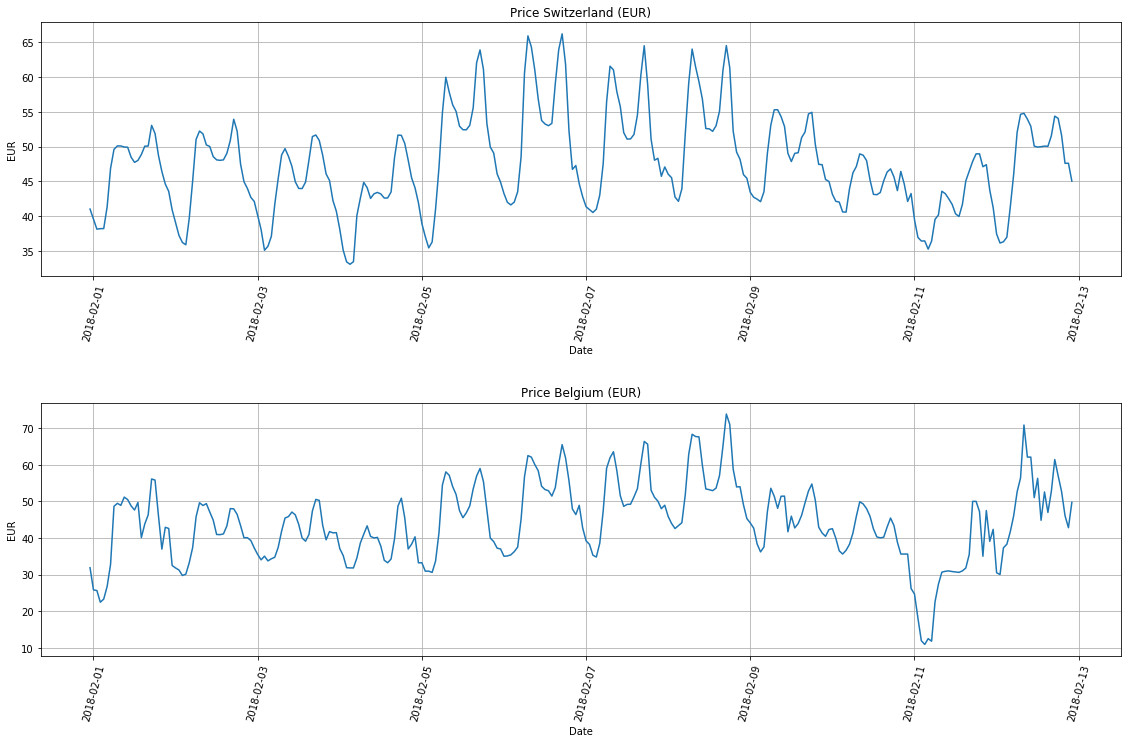

In [123]:
plt.subplot(2, 1, 1)
plt.plot(df_ch)
plt.title('Price Switzerland (EUR)')
plt.xlabel('Date')
plt.ylabel('EUR')
plt.xticks(rotation=75)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(df_de)
plt.title('Price Belgium (EUR)')
plt.xlabel('Date')
plt.ylabel('EUR')
plt.xticks(rotation=75)
plt.grid(True)

plt.subplots_adjust(top=1.1, bottom=-1.1, left=-1.25, right=1.25, hspace=0.5, wspace=1.5)

plt.show()

In [144]:
start_tm = pd.datetime(2018,2,1)
end_tm = pd.datetime(2018,2,11)
fc_de = ent_app.query_generation('CH', start_tm, end_tm, as_dataframe=True, psr_type=None, squeeze=False)


In [145]:
fc_de.head()

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
2018-02-01 01:00:00+01:00,140.0,113.0,401.0,2801.0,0.0,32.0
2018-02-01 02:00:00+01:00,107.0,111.0,328.0,2803.0,0.0,25.0
2018-02-01 03:00:00+01:00,127.0,111.0,348.0,2805.0,0.0,21.0
2018-02-01 04:00:00+01:00,155.0,133.0,368.0,2806.0,0.0,16.0
2018-02-01 05:00:00+01:00,226.0,128.0,450.0,2809.0,0.0,15.0


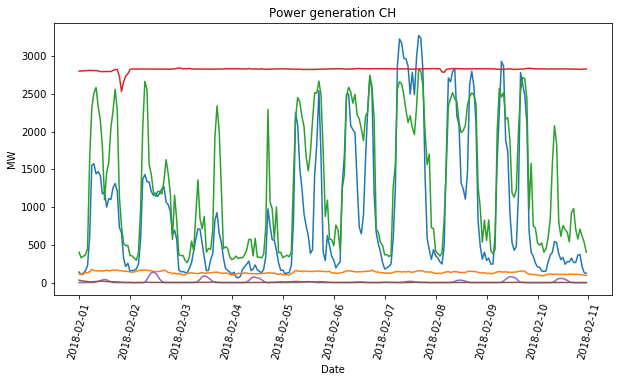

In [146]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)

plt.plot(fc_de)
plt.title('Power generation CH')
plt.xlabel('Date')
plt.ylabel('MW')
plt.xticks(rotation=75)

plt.show()

In [147]:
fc_df = fc_de.copy()

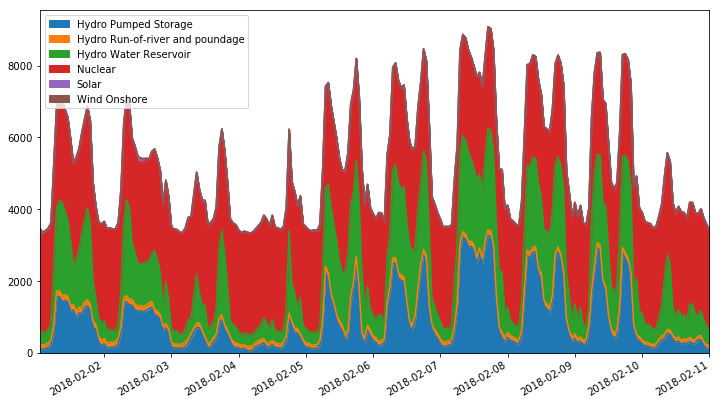

In [148]:
plt.rcParams["figure.figsize"] = (12,7)
fc_df.plot.area()